### Support Vector Machines(as Classfier)

- In general, a decision boundary (with N-1 dimensions farthest point between classes or with the greatest possible margin) is called a hyperplane.
- Everything on one side belongs to one class, and everything on the other side belongs to a different class.


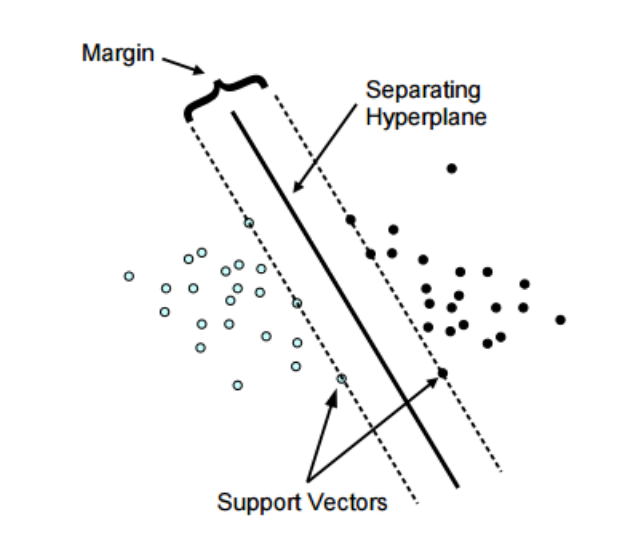

*Benefits* - robust to outliers


In [1]:
#Logistic Regression
# We will now be importing some required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
#Loading the dataset
dataset = pd.read_csv('carPurchase.csv')

In [2]:
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values
#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
#Normalizing the features
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [3]:
from sklearn.svm import SVC

In [4]:
#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
classifierObj = SVC(kernel='linear')
classifierObj.fit(X_train, y_train)
#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)

In [5]:
#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[75  4]
 [12 29]]


In [6]:
classifierObj.score(X_test, y_test)

0.8666666666666667

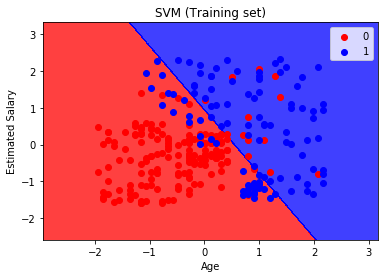

In [9]:
# Visualizing the Training set results
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifierObj.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

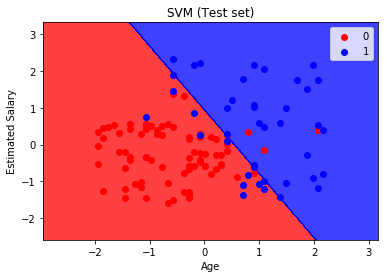

In [10]:
# Visualizing the Test set results
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifierObj.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Kernel SVM

-  Kernel methods, or the kernel trick, map data (sometimes nonlinear data) from a lowdimensional space to a highdimensional space.
-  In a higher dimension, you can solve a linear problem that’s nonlinear in lower-dimensional space.

That is, instead of representing each data point as a two-dimensional vector (feature0, feature1), we now represent it in three dimensions as (feature0, feature1, feature1 ** 2)

Which kernel to use?
-  You should always try the linear kernel first, especially if the training set is
very large or if it has plenty of features.
-  You can then try the Gaussian RBF kernel as well; it works well in most cases.
-  Finally, if you have computing power, you can also experiment with a few
other kernels, especially if there are kernels specialized for your training set’s
data structure.
 e.g. string subsequence kernel for analyzing DNA sequences

In [11]:
#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
classifierObj = SVC(kernel='rbf')
classifierObj.fit(X_train, y_train)
#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm , classifierObj.score(X_test, y_test))

[[72  7]
 [ 4 37]] 0.908333333333


In [15]:
#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
classifierObj = SVC(kernel='poly', degree=3)
classifierObj.fit(X_train, y_train)
#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm , classifierObj.score(X_test, y_test))

[[77  2]
 [17 24]] 0.841666666667


In [16]:
#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
classifierObj = SVC(kernel='sigmoid')
classifierObj.fit(X_train, y_train)
#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm , classifierObj.score(X_test, y_test))

[[65 14]
 [17 24]] 0.741666666667
